## Model 1
- Stop&Frisk and Complaint data

In [1]:
import pandas as pd
import os
import geopandas as gp
import fiona
import numpy as np
from choropleth import choroplethNYC as cp
import matplotlib.pylab as plt

In [2]:
os.getcwd()

'/Users/christine_biddlecombe/CJA/patrol_allocation'

In [3]:
files = os.listdir()

In [4]:
files = [file for file in files if file[-3:]=='csv']
names = [file[:-4] for file in files]

In [5]:
frames = []
for file, name in zip(files, names):
    name = pd.read_csv(file)
    frames.append(name)

In [6]:
files

['age_precinct.csv',
 '2016_estimations.csv',
 'StopFrisk_10thru18R.csv',
 'adjusted_day_MODEL_RESULTS.csv',
 'complaint_data.csv',
 'tract_precinct_key.csv',
 'pluto.csv',
 'precinct_pop_m.csv',
 'area_model_results.csv',
 'acs_other_demo_data.csv',
 'seven_majors.csv',
 'plutocounts.csv',
 'crash_data.csv',
 'precinct_population_dayadjust.csv',
 'vacancy_only.csv',
 'plutoSums.csv']

In [7]:
crime = frames[4] #refers to complaint_data.csv

In [8]:
crime.head()

,ADDR_PCT_CD,2010 FELONY,2010 MISDEMEANOR,2010 VIOLATION,2011 FELONY,2011 MISDEMEANOR,2011 VIOLATION,2012 FELONY,2012 MISDEMEANOR,2012 VIOLATION,...,2017 MISDEMEANOR,2017 VIOLATION,total2010,total2011,total2012,total2013,total2014,total2015,total2016,total2017
0,1,1771.0,3684.0,423.0,1774.0,3788.0,406.0,1790.0,4063.0,471.0,...,3596.0,716.0,5878.0,5968.0,6324.0,5980.0,5660.0,5657.0,6256.0,5935.0
1,10,1411.0,2285.0,408.0,1369.0,2427.0,379.0,1396.0,2494.0,382.0,...,1936.0,446.0,4104.0,4175.0,4272.0,4400.0,3945.0,3783.0,3865.0,3586.0
2,100,674.0,1441.0,413.0,870.0,1231.0,381.0,1025.0,1269.0,365.0,...,1341.0,381.0,2528.0,2482.0,2659.0,2361.0,2872.0,2651.0,2888.0,2684.0
3,101,1059.0,2062.0,568.0,1113.0,2007.0,524.0,1382.0,2102.0,568.0,...,1976.0,737.0,3689.0,3644.0,4052.0,4352.0,4469.0,4473.0,4636.0,4283.0
4,102,2129.0,3396.0,862.0,2037.0,3357.0,858.0,2141.0,3372.0,808.0,...,2623.0,868.0,6387.0,6252.0,6321.0,6738.0,6294.0,5882.0,5712.0,4829.0


In [9]:
crime.drop(['total2010', 'total2011', 'total2012', 
            'total2013', 'total2014', 'total2015', 
            'total2016', 'total2017'], axis=1, inplace=True)

In [10]:
sf = frames[2]
sf.head()

,Unnamed: 0,precinct,2010_no_arrest,2010_yes_arrest,2011_no_arrest,2011_yes_arrest,2012_no_arrest,2012_yes_arrest,2013_no_arrest,2013_yes_arrest,2014_no_arrest,2014_yes_arrest,2015_no_arrest,2015_yes_arrest,2016_no_arrest,2016_yes_arrest,2017_no_arrest,2017_yes_arrest,2018_no_arrest,2018_yes_arrest
0,0,1.0,2186.0,260.0,3411.0,215.0,2864.0,189.0,1066.0,93.0,77.0,11.0,41.0,4.0,46.0,7.0,41.0,6.0,73.0,26.0
1,1,5.0,2531.0,340.0,2746.0,372.0,2478.0,304.0,994.0,122.0,215.0,60.0,160.0,27.0,63.0,17.0,57.0,51.0,65.0,22.0
2,2,6.0,3268.0,265.0,2732.0,222.0,3437.0,200.0,1170.0,103.0,95.0,12.0,24.0,3.0,22.0,9.0,37.0,16.0,42.0,61.0
3,3,7.0,2806.0,418.0,3683.0,494.0,3119.0,382.0,913.0,207.0,245.0,88.0,136.0,29.0,41.0,12.0,58.0,52.0,101.0,37.0
4,4,9.0,4429.0,748.0,4472.0,895.0,4274.0,1008.0,1744.0,571.0,303.0,291.0,167.0,94.0,63.0,17.0,100.0,81.0,80.0,38.0


In [11]:
sf.drop(['Unnamed: 0', '2010_no_arrest', '2011_no_arrest', 
         '2012_no_arrest', '2013_no_arrest', 
         '2014_no_arrest', '2015_no_arrest',
         '2016_no_arrest', '2017_no_arrest', 
         '2018_no_arrest'], axis=1, inplace=True)

## merging dfs and adding population

In [12]:
## merge the dataframes
sfCrime = pd.merge(crime, sf, left_on='ADDR_PCT_CD',
                  right_on='precinct')

In [13]:
sfCrime.head()

,ADDR_PCT_CD,2010 FELONY,2010 MISDEMEANOR,2010 VIOLATION,2011 FELONY,2011 MISDEMEANOR,2011 VIOLATION,2012 FELONY,2012 MISDEMEANOR,2012 VIOLATION,...,precinct,2010_yes_arrest,2011_yes_arrest,2012_yes_arrest,2013_yes_arrest,2014_yes_arrest,2015_yes_arrest,2016_yes_arrest,2017_yes_arrest,2018_yes_arrest
0,1,1771.0,3684.0,423.0,1774.0,3788.0,406.0,1790.0,4063.0,471.0,...,1.0,260.0,215.0,189.0,93.0,11.0,4.0,7.0,6.0,26.0
1,10,1411.0,2285.0,408.0,1369.0,2427.0,379.0,1396.0,2494.0,382.0,...,10.0,343.0,309.0,277.0,194.0,45.0,9.0,13.0,27.0,32.0
2,100,674.0,1441.0,413.0,870.0,1231.0,381.0,1025.0,1269.0,365.0,...,100.0,335.0,360.0,234.0,103.0,29.0,17.0,8.0,36.0,36.0
3,101,1059.0,2062.0,568.0,1113.0,2007.0,524.0,1382.0,2102.0,568.0,...,101.0,795.0,532.0,404.0,234.0,76.0,30.0,10.0,16.0,17.0
4,102,2129.0,3396.0,862.0,2037.0,3357.0,858.0,2141.0,3372.0,808.0,...,102.0,884.0,738.0,822.0,323.0,169.0,63.0,6.0,10.0,19.0


## Adding in population and merging with crime df

In [17]:
pop = frames[7]
pop2 = pop[['precinct_me', 'total_pop2017']]
pop2.head()

,precinct_me,total_pop2017
0,1.0,75871
1,5.0,50839
2,6.0,59687
3,7.0,59018
4,9.0,75718


In [18]:
crimeF= pd.merge(sfCrime, pop2, left_on='ADDR_PCT_CD',
                  right_on='precinct_me')

In [19]:
crimeF.drop(['precinct_me'], axis=1, inplace=True)

In [20]:
crimeF.head()

,ADDR_PCT_CD,2010 FELONY,2010 MISDEMEANOR,2010 VIOLATION,2011 FELONY,2011 MISDEMEANOR,2011 VIOLATION,2012 FELONY,2012 MISDEMEANOR,2012 VIOLATION,...,2010_yes_arrest,2011_yes_arrest,2012_yes_arrest,2013_yes_arrest,2014_yes_arrest,2015_yes_arrest,2016_yes_arrest,2017_yes_arrest,2018_yes_arrest,total_pop2017
0,1,1771.0,3684.0,423.0,1774.0,3788.0,406.0,1790.0,4063.0,471.0,...,260.0,215.0,189.0,93.0,11.0,4.0,7.0,6.0,26.0,75871
1,10,1411.0,2285.0,408.0,1369.0,2427.0,379.0,1396.0,2494.0,382.0,...,343.0,309.0,277.0,194.0,45.0,9.0,13.0,27.0,32.0,49476
2,100,674.0,1441.0,413.0,870.0,1231.0,381.0,1025.0,1269.0,365.0,...,335.0,360.0,234.0,103.0,29.0,17.0,8.0,36.0,36.0,52075
3,101,1059.0,2062.0,568.0,1113.0,2007.0,524.0,1382.0,2102.0,568.0,...,795.0,532.0,404.0,234.0,76.0,30.0,10.0,16.0,17.0,70937
4,102,2129.0,3396.0,862.0,2037.0,3357.0,858.0,2141.0,3372.0,808.0,...,884.0,738.0,822.0,323.0,169.0,63.0,6.0,10.0,19.0,137972


In [21]:
crimeF.shape

(76, 36)

## Creating Rates, Creating Column that represents sums of all rates

In [22]:
a = crimeF.values

In [23]:
crimeF.iloc[:,1:35] = 100*(a[:,1:35] / a[:,35,None]) # multiply by 100 so that when i divide by population 
                                                     # value is a percent

In [24]:
crimeRates = crimeF # renaming for clarity
crimeRates.head()

,ADDR_PCT_CD,2010 FELONY,2010 MISDEMEANOR,2010 VIOLATION,2011 FELONY,2011 MISDEMEANOR,2011 VIOLATION,2012 FELONY,2012 MISDEMEANOR,2012 VIOLATION,...,2010_yes_arrest,2011_yes_arrest,2012_yes_arrest,2013_yes_arrest,2014_yes_arrest,2015_yes_arrest,2016_yes_arrest,2017_yes_arrest,2018_yes_arrest,total_pop2017
0,1,2.334225,4.855610,0.557525,2.338179,4.992685,0.535119,2.359268,5.355142,0.620791,...,0.342687,0.283376,0.249107,0.122576,0.014498,0.005272,0.009226,0.007908,0.034269,75871
1,10,2.851888,4.618401,0.824642,2.766998,4.905409,0.766028,2.821570,5.040828,0.772092,...,0.693265,0.624545,0.559867,0.392109,0.090953,0.018191,0.026275,0.054572,0.064678,49476
2,100,1.294287,2.767163,0.793087,1.670667,2.363898,0.731637,1.968315,2.436870,0.700912,...,0.643303,0.691311,0.449352,0.197792,0.055689,0.032645,0.015362,0.069131,0.069131,52075
3,101,1.492874,2.906805,0.800710,1.568998,2.829271,0.738684,1.948208,2.963193,0.800710,...,1.120713,0.749961,0.569519,0.329870,0.107137,0.042291,0.014097,0.022555,0.023965,70937
4,102,1.543067,2.461369,0.624764,1.476387,2.433102,0.621865,1.551764,2.443974,0.585626,...,0.640710,0.534891,0.595773,0.234105,0.122489,0.045661,0.004349,0.007248,0.013771,137972


In [25]:
# creating value for total crime rate per precinct
crimeRates['total_crime']= crimeRates.iloc[:,1:35].sum(axis=1)

In [26]:
# creating new column as a percentage of total crime in the city, based sum of total_crime column
# each value will represent the share of total crime that occurs in that precinct 
crimeRates['total_crime_share'] = (crimeRates.total_crime / crimeRates.total_crime.sum())

In [27]:
crimeRates.total_crime_share.sum()

1.0

## Multiply Rates by 20000 to get patrol allocation by precinct

In [28]:
crimeRates['allocation'] = crimeRates.total_crime_share * 20000

In [29]:
crimeRates['allocation'] = crimeRates['allocation'].astype(int)

In [30]:
#crimeRates.rename(columns={'ADDR_PCT_CD':'precinct'}, inplace=True)

In [31]:
crimeRates.describe()

,ADDR_PCT_CD,2010 FELONY,2010 MISDEMEANOR,2010 VIOLATION,2011 FELONY,2011 MISDEMEANOR,2011 VIOLATION,2012 FELONY,2012 MISDEMEANOR,2012 VIOLATION,...,2013_yes_arrest,2014_yes_arrest,2015_yes_arrest,2016_yes_arrest,2017_yes_arrest,2018_yes_arrest,total_pop2017,total_crime,total_crime_share,allocation
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,62.565789,2.231796,4.621627,0.801284,2.196977,4.459627,0.753763,2.286481,4.454640,0.800252,...,0.222660,0.099023,0.053494,0.023386,0.046950,0.043282,111035.013158,60.251210,0.013158,262.684211
std,35.735075,3.352681,6.777730,0.545786,3.058042,6.407057,0.520844,3.143161,6.332671,0.579573,...,0.220266,0.129315,0.078772,0.027907,0.035121,0.032238,49834.756450,78.989188,0.017250,344.985882
min,1.000000,0.569763,1.275496,0.132503,0.530012,1.240938,0.181087,0.512345,1.206381,0.225255,...,0.029739,0.008484,0.004130,0.001132,0.004744,0.001423,12716.000000,15.653019,0.003418,68.000000
25%,31.500000,1.307736,2.546007,0.537523,1.362702,2.419390,0.504071,1.356480,2.442198,0.502554,...,0.106218,0.031629,0.017661,0.007132,0.020825,0.021040,74005.500000,34.600370,0.007556,150.750000
50%,64.500000,1.696477,3.348962,0.690497,1.692260,3.259574,0.663725,1.845007,3.267665,0.658741,...,0.166623,0.066110,0.031017,0.015221,0.036503,0.038552,106736.500000,46.454378,0.010145,202.500000
75%,95.500000,2.432266,5.299400,0.988625,2.345874,5.074393,0.936327,2.422931,5.109176,0.961894,...,0.261286,0.105090,0.050396,0.026329,0.063339,0.057205,146905.000000,67.640335,0.014772,294.500000
max,123.000000,30.355458,60.938975,4.529726,27.720981,57.636049,4.427493,28.452344,57.006920,4.891475,...,1.690783,0.778547,0.482707,0.173010,0.153997,0.220195,237772.000000,714.249764,0.155981,3119.000000


In [32]:
crimeRates3000 = crimeRates[crimeRates.allocation == 3119]
crimeRates3000.head()

,ADDR_PCT_CD,2010 FELONY,2010 MISDEMEANOR,2010 VIOLATION,2011 FELONY,2011 MISDEMEANOR,2011 VIOLATION,2012 FELONY,2012 MISDEMEANOR,2012 VIOLATION,...,2013_yes_arrest,2014_yes_arrest,2015_yes_arrest,2016_yes_arrest,2017_yes_arrest,2018_yes_arrest,total_pop2017,total_crime,total_crime_share,allocation
22,14,30.355458,60.938975,4.529726,27.720981,57.636049,4.427493,28.452344,57.00692,4.891475,...,1.690783,0.778547,0.432526,0.17301,0.141554,0.220195,12716,714.249764,0.155981,3119


In [33]:
# crimeRates.iloc[crimeRates['total_crime_share'].argmax()] # find column with max in total_Crime_share column, 
                                                          # print associated values 

In [34]:
# crimeRates.iloc[crimeRates['total_crime_share'].argmin()] # find column with min in total_Crime_share column, 
                                                          # print associated values 

## Merging in Shapefile to Visualize Allocations

In [35]:
url = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
precinct = gp.GeoDataFrame.from_file(url)
precinct.head(2)

,precinct,shape_area,shape_leng,geometry
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...


In [36]:
allocation = pd.merge(precinct, crimeRates, 
                      left_on='precinct',
                     right_on='ADDR_PCT_CD')

In [37]:
allocation.to_crs(epsg=2263, inplace=True)

Text(0.5,1,'Allocations Based on Crime and Stop&Frisk')

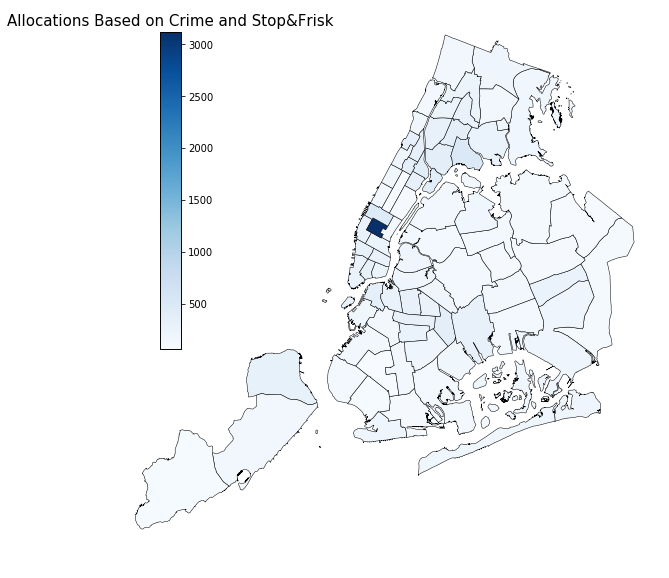

In [38]:
cp(allocation, column='allocation', cmap="Blues", edgecolor="black",lw=.5)
plt.title('Allocations Based on Crime and Stop&Frisk' ,fontsize=(15))

Figure 1: Obviously something weird going in with one precinct in Manhattan. Turns out it's Precinct 14 in Midtown. Likely a lot of petty crime driving up the allocation. 

In [39]:
## Removing outlier and then plotting again 

In [40]:
crime_noOutlier = allocation[allocation.allocation != 3119]

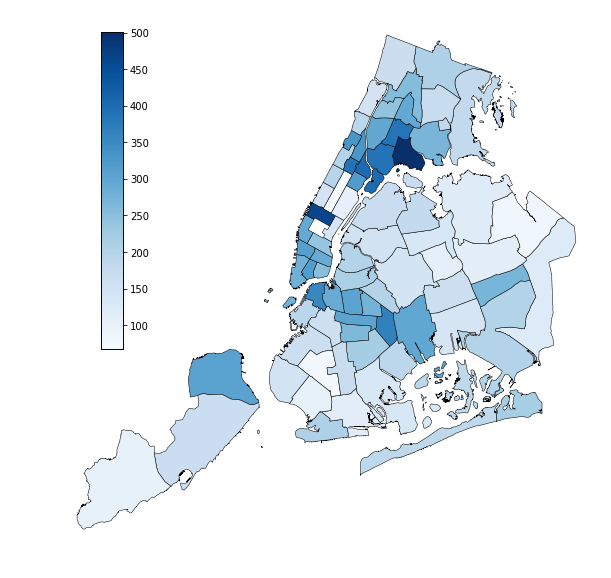

In [48]:
cp(crime_noOutlier, column='allocation', cmap="Blues", 
   edgecolor="black", lw=.5);
#plt.title('Allocations Based on Crime and Stop&Frisk' ,fontsize=(15));